# Problem set 1: Titanic survivor data

In [1]:
import numpy
import pandas
import statsmodels.api as sm
import os

In [14]:
file_path = 'titanic-data.csv'
df = pandas.read_csv(file_path)
pandas.isna(df['Sex']).sum()

0

## Simple Heuristic

In [8]:
import numpy
import pandas
import statsmodels.api as sm

def simple_heuristic(file_path):
    '''
    In this exercise, we will perform some rudimentary practices similar to those of
    an actual data scientist.
    
    Part of a data scientist's job is to use her or his intuition and insight to
    write algorithms and heuristics. A data scientist also creates mathematical models 
    to make predictions based on some attributes from the data that they are examining.

    We would like for you to take your knowledge and intuition about the Titanic
    and its passengers' attributes to predict whether or not the passengers survived
    or perished. You can read more about the Titanic and specifics about this dataset at:
    http://en.wikipedia.org/wiki/RMS_Titanic
    http://www.kaggle.com/c/titanic-gettingStarted
        
    In this exercise and the following ones, you are given a list of Titantic passengers
    and their associated information. More information about the data can be seen at the 
    link below:
    http://www.kaggle.com/c/titanic-gettingStarted/data. 

    For this exercise, you need to write a simple heuristic that will use
    the passengers' gender to predict if that person survived the Titanic disaster.
    
    You prediction should be 78% accurate or higher.
        
    Here's a simple heuristic to start off:
       1) If the passenger is female, your heuristic should assume that the
       passenger survived.
       2) If the passenger is male, you heuristic should
       assume that the passenger did not survive.
    
    You can access the gender of a passenger via passenger['Sex'].
    If the passenger is male, passenger['Sex'] will return a string "male".
    If the passenger is female, passenger['Sex'] will return a string "female".

    Write your prediction back into the "predictions" dictionary. The
    key of the dictionary should be the passenger's id (which can be accessed
    via passenger["PassengerId"]) and the associated value should be 1 if the
    passenger survied or 0 otherwise.

    For example, if a passenger is predicted to have survived:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 1

    And if a passenger is predicted to have perished in the disaster:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 0
    
    You can also look at the Titantic data that you will be working with
    at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/titanic_data.csv
    '''

    predictions = {}
    df = pandas.read_csv(file_path)
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        if passenger['Sex'] == 'male':
            predictions[passenger_id] = 0
        else:
            predictions[passenger_id] = 1
      
    return predictions

In [12]:
simple_heuristic(file_path)

{1: 1,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 1,
 14: 1,
 15: 0,
 16: 0,
 17: 1,
 18: 1,
 19: 0,
 20: 0,
 21: 1,
 22: 1,
 23: 0,
 24: 1,
 25: 0,
 26: 0,
 27: 1,
 28: 1,
 29: 0,
 30: 1,
 31: 1,
 32: 0,
 33: 0,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: 0,
 46: 1,
 47: 1,
 48: 0,
 49: 1,
 50: 0,
 51: 1,
 52: 1,
 53: 0,
 54: 0,
 55: 1,
 56: 1,
 57: 0,
 58: 1,
 59: 0,
 60: 1,
 61: 1,
 62: 0,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 0,
 68: 1,
 69: 0,
 70: 1,
 71: 1,
 72: 0,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 0,
 81: 1,
 82: 1,
 83: 0,
 84: 1,
 85: 0,
 86: 0,
 87: 1,
 88: 1,
 89: 0,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 0,
 100: 1,
 101: 0,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 0,
 108: 1,
 109: 1,
 110: 0,
 111: 1,
 112: 0,
 113: 1,
 114: 0,
 115: 0,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 0,
 121: 1,
 122: 1,
 123: 1,
 

## More sophisticated heuristic

In [44]:
import numpy
import pandas
import statsmodels.api as sm

def complex_heuristic(file_path):
    '''
    You are given a list of Titantic passengers and their associated
    information. More information about the data can be seen at the link below:
    http://www.kaggle.com/c/titanic-gettingStarted/data

    For this exercise, you need to write a more sophisticated algorithm
    that will use the passengers' gender and their socioeconomical class and age 
    to predict if they survived the Titanic diaster. 
    
    You prediction should be 79% accurate or higher.
    
    Here's the algorithm, predict the passenger survived if:
    1) If the passenger is female or
    2) if his/her socioeconomic status is high AND if the passenger is under 18
    
    Otherwise, your algorithm should predict that the passenger perished in the disaster.
    
    Or more specifically in terms of coding:
    female or (high status and under 18)
    
    You can access the gender of a passenger via passenger['Sex'].
    If the passenger is male, passenger['Sex'] will return a string "male".
    If the passenger is female, passenger['Sex'] will return a string "female".
    
    You can access the socioeconomic status of a passenger via passenger['Pclass']:
    High socioeconomic status -- passenger['Pclass'] is 1
    Medium socioeconomic status -- passenger['Pclass'] is 2
    Low socioeconomic status -- passenger['Pclass'] is 3

    You can access the age of a passenger via passenger['Age'].
    
    Write your prediction back into the "predictions" dictionary. The
    key of the dictionary should be the Passenger's id (which can be accessed
    via passenger["PassengerId"]) and the associated value should be 1 if the
    passenger survived or 0 otherwise. 

    For example, if a passenger is predicted to have survived:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 1

    And if a passenger is predicted to have perished in the disaster:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 0
    
    You can also look at the Titantic data that you will be working with
    at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/titanic_data.csv
    '''

    predictions = {}
    df = pandas.read_csv(file_path)
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        if (passenger['Sex']=='female') | ((passenger['Pclass']==1) & (passenger['Age']<18)):
            predictions[passenger_id] = 1
        else:
            predictions[passenger_id] = 0

    return predictions


In [45]:
complex_heuristic(file_path)

{1: 0,
 2: 1,
 3: 1,
 4: 1,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 0,
 14: 0,
 15: 1,
 16: 1,
 17: 0,
 18: 0,
 19: 1,
 20: 1,
 21: 0,
 22: 0,
 23: 1,
 24: 0,
 25: 1,
 26: 1,
 27: 0,
 28: 0,
 29: 1,
 30: 0,
 31: 0,
 32: 1,
 33: 1,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 0,
 44: 1,
 45: 1,
 46: 0,
 47: 0,
 48: 1,
 49: 0,
 50: 1,
 51: 0,
 52: 0,
 53: 1,
 54: 1,
 55: 0,
 56: 0,
 57: 1,
 58: 0,
 59: 1,
 60: 0,
 61: 0,
 62: 1,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 1,
 68: 0,
 69: 1,
 70: 0,
 71: 0,
 72: 1,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 1,
 81: 0,
 82: 0,
 83: 1,
 84: 0,
 85: 1,
 86: 1,
 87: 0,
 88: 0,
 89: 1,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 1,
 100: 0,
 101: 1,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 1,
 108: 0,
 109: 0,
 110: 1,
 111: 0,
 112: 1,
 113: 0,
 114: 1,
 115: 1,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 1,
 121: 0,
 122: 0,
 123: 0,
 

## Custom Heuristic

In [91]:
import numpy
import pandas
import statsmodels.api as sm

def custom_heuristic(file_path):
    '''
    You are given a list of Titantic passengers and their associated
    information. More information about the data can be seen at the link below:
    http://www.kaggle.com/c/titanic-gettingStarted/data

    For this exercise, you need to write a custom heuristic that will take
    in some combination of the passenger's attributes and predict if the passenger
    survived the Titanic diaster.

    Can your custom heuristic beat 80% accuracy?
    
    The available attributes are:
    Pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name            Name
    Sex             Sex
    Age             Age
    SibSp           Number of Siblings/Spouses Aboard
    Parch           Number of Parents/Children Aboard
    Ticket          Ticket Number
    Fare            Passenger Fare
    Cabin           Cabin
    Embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)
                    
    SPECIAL NOTES:
    Pclass is a proxy for socioeconomic status (SES)
    1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in years; fractional if age less than one
    If the age is estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. SibSp and Parch)
    some relations were ignored. The following are the definitions used
    for SibSp and Parch.

    Sibling:  brother, sister, stepbrother, or stepsister of passenger aboard Titanic
    Spouse:   husband or wife of passenger aboard Titanic (mistresses and fiancees ignored)
    Parent:   mother or father of passenger aboard Titanic
    Child:    son, daughter, stepson, or stepdaughter of passenger aboard Titanic
    
    Write your prediction back into the "predictions" dictionary. The
    key of the dictionary should be the passenger's id (which can be accessed
    via passenger["PassengerId"]) and the associating value should be 1 if the
    passenger survvied or 0 otherwise. 

    For example, if a passenger is predicted to have survived:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 1

    And if a passenger is predicted to have perished in the disaster:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 0
    
    You can also look at the Titantic data that you will be working with
    at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/titanic_data.csv
    '''

    predictions = {}
    df = pandas.read_csv(file_path)
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        if (passenger['Sex']=='female'):
            predictions[passenger_id] = 1
        elif ((passenger['Pclass']<3) & (passenger['Age']<16)):
            predictions[passenger_id] = 1
         
        else:
            predictions[passenger_id] = 0

    return predictions


In [50]:
#custom_heuristic(file_path)

In [55]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


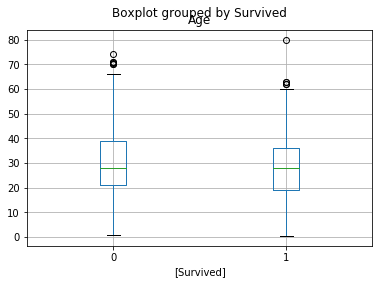

In [94]:
#df.boxplot(column = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], by = ['Survived'])
df.boxplot(column = ['Age'], by = ['Survived'])
#,'Age','SibSp','Parch','Fare'

In [76]:
import seaborn as sns

C:\Users\vipac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


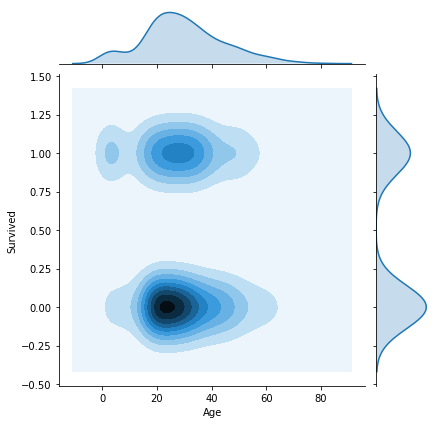

In [92]:
sns.jointplot(y="Survived", x="Age", data=df, kind="kde");

C:\Users\vipac\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vipac\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


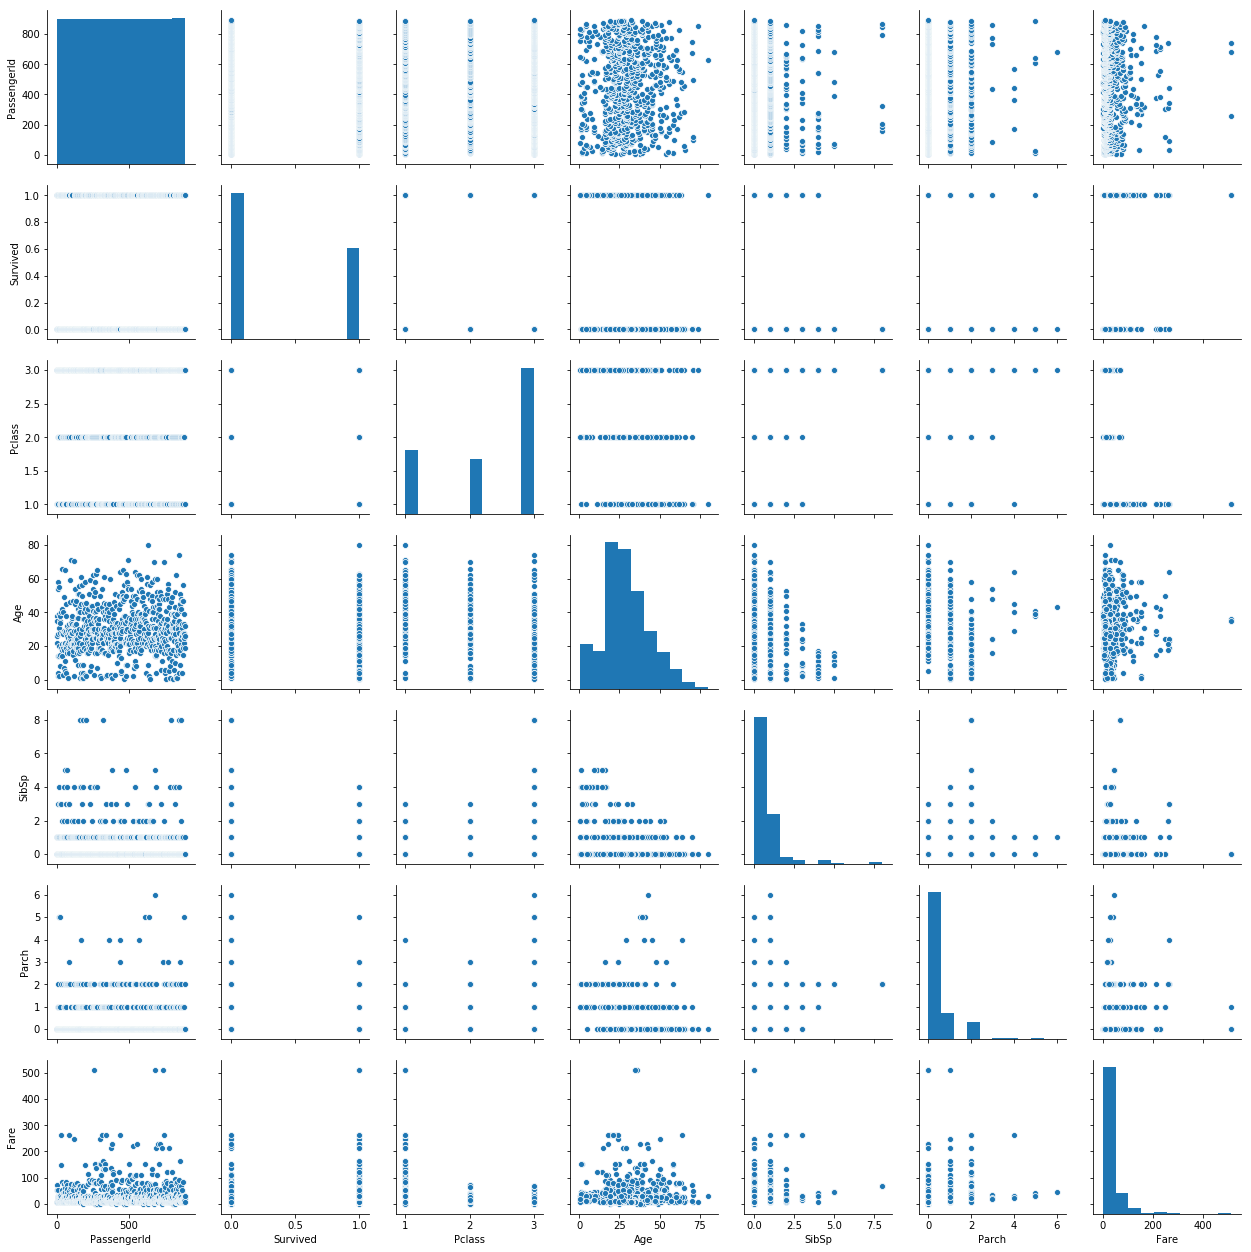

In [84]:
sns.pairplot(df)